<a href="https://colab.research.google.com/github/mart-anthony-stark/Machine-Learning-and-Deep-Learning/blob/main/Spam_Detection_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam Detection Machine Learning

# Loading and exploring data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot  as plt
import seaborn as sns

In [2]:
df = pd.read_table("SMSSpamCollection.txt", sep="\t", header=None, names=['label', 'messages'])

df.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
def explore_data(df):
  print("Data Shape:",df.shape)
  print("="*30)
  print("Info:")
  df.info()
  print("="*30)
  print("Missing/Null values:")
  print(df.isna().sum())
  print("="*30)
  print("Data desc:\n",df.describe())
  print("="*30)
  print("Value Counts:\n",df['label'].value_counts())

explore_data(df)

Data Shape: (5572, 2)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
Missing/Null values:
label       0
messages    0
dtype: int64
Data desc:
        label                messages
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30
Value Counts:
 ham     4825
spam     747
Name: label, dtype: int64


# Exploratory Data Analysis

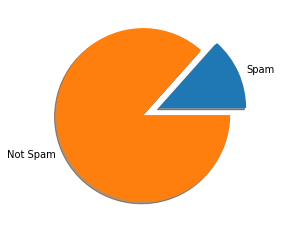

Total spam:  747
Total ham:  4825


In [23]:
is_spam = df['label'] == 'spam'
spam_length = len(df[is_spam])
ham_length = len(df[~is_spam])

pie_arr = np.array([spam_length, ham_length])
plt.pie(pie_arr, labels=['Spam', 'Not Spam'], explode=[0.2,0.0], shadow=True)
plt.show()

print('Total spam: ', spam_length)
print('Total ham: ', ham_length)

# Text Preprocessing
### Stemming and lemmatization
- Stemming and lemmatization are methods used by search engines and chatbots to analyze the meaning behind a word. Stemming uses the stem of the word, while lemmatization uses the context in which the word is being used.

In [24]:
def text_preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will") 
    return x  

df["Preprocessed Text"] = df["messages"].apply(lambda x: text_preprocess(x))
df.head()

,label,messages,Preprocessed Text
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i do not think he goes to usf, he lives ar..."


# Feature Engineering
Replacing the target categorical data type into numerical

HAM: 0

SPAM: 1


In [28]:
label_mapping = {"ham": 0, "spam": 1}
df['label'] = df['label'].replace(label_mapping)

df.head()

,label,messages,Preprocessed Text
0,0,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,0,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...","nah i do not think he goes to usf, he lives ar..."


# Model Development

In [32]:
from sklearn.model_selection import train_test_split

X = df['Preprocessed Text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [33]:
print("Training set:", [X_train.shape, y_train.shape])
print("Testing set:", [X_test.shape, y_test.shape])

Training set: [(4457,), (4457,)]
Testing set: [(1115,), (1115,)]


## Text Vectorization
Convert a collection of text documents to a matrix of token counts.

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
training_data = vectorizer.fit_transform(X_train)

testing_data = vectorizer.transform(X_test)

In [39]:
# vectorizer.get_feature_names()

In [44]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(training_data, y_train)

print("Accuracy:",clf.score(testing_data, y_test))

Accuracy: 0.9883408071748879


In [45]:
# Prediction
predictions = clf.predict(testing_data)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy: ", format(accuracy_score(y_test, predictions)))
print("Precision: ", format(precision_score(y_test, predictions)))
print("Recall: ", format(recall_score(y_test, predictions)))
print("F1: ", format(f1_score(y_test, predictions)))

Accuracy:  0.9883408071748879
Precision:  0.9779411764705882
Recall:  0.9300699300699301
F1:  0.953405017921147


In [73]:
emails = pd.Series(["Hello Mart! This is accenture...", "Congratulations! You won 100,000 worth of load","New login to Spotify We noticed you logged in from a new device. If this was you, there’s nothing for you to do right now. Location Philippines Time August 3, 2022 at 7:14:56 PM PST"])
test = vectorizer.transform(emails)

In [77]:
test_predictions = clf.predict(test)
for i, prediction in enumerate(test_predictions):
  label_keys = list(label_mapping.keys())
  label_values = list(label_mapping.values())
  print(emails[i], " - ", label_keys[label_values.index(prediction)].upper())
  print("-"*80)

Hello Mart! This is accenture...  -  HAM
--------------------------------------------------------------------------------
Congratulations! You won 100,000 worth of load  -  SPAM
--------------------------------------------------------------------------------
New login to Spotify We noticed you logged in from a new device. If this was you, there’s nothing for you to do right now. Location Philippines Time August 3, 2022 at 7:14:56 PM PST  -  HAM
--------------------------------------------------------------------------------
